# PROJECT PHASE 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import the necessary libraries

In [5]:
df = pd.read_csv('my_restaurant_inspection.csv') 
# Load the CSV file into a DataFrame

In [6]:
df.head()
# Display the first few rows of the DataFrame 
#to confirm it's loaded correctly

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50063995,NEW STAR CHINESE RESTAURANT,Brooklyn,2212,AVENUE X,11235.0,7188916868,Chinese,2017-11-28T00:00:00.000,Violations were cited in the following area(s).,...,2019-12-27T06:01:01.000,Cycle Inspection / Re-inspection,40.592978,-73.947971,315.0,48.0,59401.0,3203266.0,3.074220e+09,BK17
1,41566404,LUNCH BOX,Staten Island,1612,FOREST AVENUE,10302.0,7184482929,American,2018-10-04T00:00:00.000,Violations were cited in the following area(s).,...,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,40.624732,-74.142420,501.0,50.0,25100.0,5028764.0,5.014370e+09,SI28
2,50017922,SANTINA,Manhattan,820,WASHINGTON ST,10014.0,2122543000,Armenian,2016-07-28T00:00:00.000,Violations were cited in the following area(s).,...,2019-12-27T06:01:01.000,Cycle Inspection / Re-inspection,40.739580,-74.008036,102.0,3.0,7900.0,1089240.0,1.006440e+09,MN23
3,50091842,FEDOROFF'S STEAKS,Manhattan,4,CORTLANDT ST,10007.0,9293558347,Sandwiches,2019-10-25T00:00:00.000,Violations were cited in the following area(s).,...,2019-12-27T06:01:01.000,Pre-permit (Operational) / Re-inspection,40.709922,-74.010240,101.0,1.0,1300.0,1001079.0,1.000630e+09,MN25
4,41191438,CHERYL'S GLOBAL SOUL,Brooklyn,236,UNDERHILL AVENUE,11238.0,3475392855,American,2018-02-06T00:00:00.000,Violations were cited in the following area(s).,...,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,40.673479,-73.967274,308.0,35.0,20700.0,3029365.0,3.011720e+09,BK64


In [7]:
df.shape
# number of columns and rows

(398441, 26)

### Change Data Type

In [8]:
print(df.dtypes)
# data types 

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
dtype: object


In [9]:
df['ZIPCODE'] = df['ZIPCODE'].astype(float).astype(str)
#changing the datatype of zipcode

### Combine 3 columns

In [10]:
df['Address'] = df['BUILDING'].str.cat(df['STREET'], sep=' - ').str.cat(df['ZIPCODE'], sep=' - ')
# Concatenate 'BUILDING', 'STREET', and 'ZIPCODE' columns and store the result in the 'Address' column,
# using ' - ' as the separator.

### Drop Column

In [11]:
df.drop(columns=['BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'BIN', 'BBL', 'NTA','Latitude','Longitude'], inplace=True)
# Drop the specified columns from the DataFrame 'df' to remove unnecessary information.

### Change Date Format

In [12]:
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'], format='%Y-%m-%dT%H:%M:%S.%f')
# Convert the 'INSPECTION DATE' column to a datetime format with the specified format

### Change Index

In [13]:
df = df.set_index('CAMIS').reset_index(drop=True)
# Set the 'CAMIS' column as the index of the DataFrame 'df'
# and reset the index, dropping the previous index

### Change Column Names

In [14]:
df = df.rename(columns={
    'DBA': 'Restaurant Name',
    'BORO': 'Cities'
})
# Rename DataFrame columns for better clarity and consistency
# Renaming the 'DBA' column to 'Restaurant Name' and 'BORO' to 'Cities'

### Change Text Casing

In [15]:
df.columns = df.columns.str.title()
# Convert column names to title case for improved readability and consistency

In [16]:
df['Restaurant Name'] = df['Restaurant Name'].str.title()
# Convert 'Restaurant Name' column values to title case

In [17]:
df['Address'] = df['Address'].str.title()
# Convert 'Address' column values to title case

### Rearrange columns

In [18]:
df.columns

Index(['Restaurant Name', 'Cities', 'Cuisine Description', 'Inspection Date',
       'Action', 'Violation Code', 'Violation Description', 'Critical Flag',
       'Score', 'Grade', 'Grade Date', 'Record Date', 'Inspection Type',
       'Community Board', 'Council District', 'Census Tract', 'Address'],
      dtype='object')

In [19]:
df = df[['Restaurant Name','Address' ,'Cities', 'Cuisine Description', 'Inspection Date',
       'Action', 'Violation Code', 'Violation Description', 'Critical Flag',
       'Score', 'Grade', 'Grade Date', 'Record Date', 'Inspection Type',
       'Community Board', 'Council District', 'Census Tract']]
# we are rearranging all the columns in the dataset

### Remove duplicate rows

In [20]:
duplicate_rows = df[df.duplicated()]

In [21]:
print(duplicate_rows)
#printing all the duplicate rows

                              Restaurant Name  \
15997                                     NaN   
54001                                     NaN   
67656                   Radio City Music Hall   
84993                                     NaN   
93737   Club Pacc - Y & B Entertainment Manor   
...                                       ...   
381016                                    NaN   
387725               Chicken/Fries Concession   
388728  Club Pacc - Y & B Entertainment Manor   
390035                           Amc Theatres   
394024                    Eastview Sr. Living   

                                        Address     Cities  \
15997               115 - Delancey St - 10002.0  Manhattan   
54001              451 - Clarkson Ave - 11203.0   Brooklyn   
67656   1260 - Avenue Of The Americas - 10020.0  Manhattan   
84993              451 - Clarkson Ave - 11203.0   Brooklyn   
93737                3509 - Prince Strret - Nan     Queens   
...                                    

In [22]:
df.shape

(398441, 17)

In [23]:
df = df.drop_duplicates()
#dropping all the duplicate rows

In [24]:
df.shape
#shape of the dataset after dropping duplicate rows

(398374, 17)

In [25]:
duplicate_rows = df[df.duplicated()]

In [26]:
print(duplicate_rows)
# printing duplicate rows after dropping them

Empty DataFrame
Columns: [Restaurant Name, Address, Cities, Cuisine Description, Inspection Date, Action, Violation Code, Violation Description, Critical Flag, Score, Grade, Grade Date, Record Date, Inspection Type, Community Board, Council District, Census Tract]
Index: []


### Drop NA

In [27]:
df.dropna(subset=['Cities', 'Critical Flag', 'Score', 'Grade'], inplace=True)
# Drop rows with missing data in the 'Cities', 'Critical Flag', 'Score', and 'Grade' columns

In [28]:
df = df.sort_values(by='Cities', ascending=True)
# Sort the DataFrame 'df' by the 'Cities' column in ascending order

In [29]:
df.shape

(199671, 17)

In [30]:
df.head()

,Restaurant Name,Address,Cities,Cuisine Description,Inspection Date,Action,Violation Code,Violation Description,Critical Flag,Score,Grade,Grade Date,Record Date,Inspection Type,Community Board,Council District,Census Tract
94700,Kinfolk,94 - Wythe Ave - 11249.0,0,American,2017-10-12,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,11.0,A,2017-10-12T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Re-inspection,NaN,NaN,NaN
120377,Flik (American Express),200 - Vesey Street - 10285.0,0,American,2017-05-25,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,8.0,A,2017-05-25T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,NaN,NaN,NaN
120384,Pokeworks (Entrance Is On 41St Street Between ...,122 - E 42Nd St - 10168.0,0,Hawaiian,2019-05-28,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,10.0,A,2019-05-28T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,NaN,NaN,NaN
285785,Freehold,45 - S 3Rd St - 11249.0,0,American,2018-07-30,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,41.0,C,2018-07-30T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Re-inspection,NaN,NaN,NaN
40253,Freehold,45 - S 3Rd St - 11249.0,0,American,2016-10-31,Violations were cited in the following area(s).,02H,Food not cooled by an approved method whereby ...,Y,26.0,B,2016-10-31T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Re-inspection,NaN,NaN,NaN


### Remove Cities with null values

In [31]:
df = df[df['Cities'] != '0']
# This code removes rows with 'Cities' containing the value '0' from the DataFrame 'df'.

In [32]:
df.shape

(199623, 17)

In [33]:
df

,Restaurant Name,Address,Cities,Cuisine Description,Inspection Date,Action,Violation Code,Violation Description,Critical Flag,Score,Grade,Grade Date,Record Date,Inspection Type,Community Board,Council District,Census Tract
252690,Mcdonald'S,599 - East Tremont Avenue - 10457.0,Bronx,Hamburgers,2018-06-08,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,9.0,A,2018-06-08T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,206.0,17.0,37504.0
55459,Papa John'S Pizza,1520 - Westchester Ave - 10472.0,Bronx,Pizza,2017-11-09,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,13.0,A,2017-11-09T00:00:00.000,2019-12-27T06:01:01.000,Pre-permit (Operational) / Initial Inspection,209.0,18.0,5002.0
253189,Fordham Restaurant,2506 - Grand Concourse - 10458.0,Bronx,American,2018-07-26,Violations were cited in the following area(s).,02E,"Whole frozen poultry or poultry breasts, other...",Y,12.0,A,2018-07-26T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,207.0,15.0,39901.0
253234,Jes Catering,1438 - E Gun Hill Rd - 10469.0,Bronx,Caribbean,2019-06-05,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,7.0,A,2019-06-05T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,211.0,12.0,36000.0
253224,Basics Cafeteria,1064 - Franklin Avenue - 10456.0,Bronx,American,2017-02-23,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Y,12.0,A,2017-02-23T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,203.0,16.0,18500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50061,Bin 5,1233 - Bay St - 10305.0,Staten Island,Italian,2019-08-14,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Y,16.0,B,2019-08-14T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Re-inspection,501.0,49.0,600.0
93785,Bella Mama Rose,264 - Morningstar Road - 10303.0,Staten Island,Italian,2017-02-28,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,6.0,A,2017-02-28T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Re-inspection,501.0,49.0,23900.0
38147,Golden Dragon,677 - Bay St - 10304.0,Staten Island,Chinese,2018-09-18,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,20.0,B,2018-09-18T00:00:00.000,2019-12-27T06:01:01.000,Pre-permit (Operational) / Re-inspection,501.0,49.0,600.0
307949,Banhmigos,4018 - Hylan Blvd - 10308.0,Staten Island,Vietnamese/Cambodian/Malaysia,2019-09-09,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,12.0,A,2019-09-09T00:00:00.000,2019-12-27T06:01:01.000,Pre-permit (Operational) / Initial Inspection,503.0,51.0,15603.0


In [34]:
grouped_df = df.groupby(['Violation Code', 'Violation Description']).size().reset_index(name='count')
#Group the DataFrame by 'Violation Code' and 'Violation Description', and count the occurrences.

In [35]:
grouped_df

,Violation Code,Violation Description,count
0,02A,Food not cooked to required minimum temperature.,133
1,02B,Hot food item not held at or above 140º F.,9041
2,02C,Hot food item that has been cooked and refrige...,244
3,02D,Precooked potentially hazardous food from comm...,41
4,02E,"Whole frozen poultry or poultry breasts, other...",1
...,...,...,...
58,10F,Non-food contact surface improperly constructe...,40862
59,10G,Food service operation occurring in room used ...,39
60,10H,Proper sanitization not provided for utensil w...,3815
61,10I,"Single service item reused, improperly stored,...",2743


In [36]:
df.describe()
#Generate statistical summary for the DataFrame 'df'.

,Score,Community Board,Council District,Census Tract
count,199623.000000,196544.000000,196544.000000,196544.000000
mean,13.228350,248.972230,20.005180,29033.631589
std,8.868005,131.005207,15.771736,30862.363337
min,-1.000000,101.000000,1.000000,100.000000
25%,9.000000,105.000000,4.000000,8000.000000
50%,12.000000,301.000000,20.000000,16200.000000
75%,13.000000,401.000000,34.000000,40500.000000
max,144.000000,595.000000,51.000000,162100.000000


### City wise analysis

#### City with the Highest/Lowest Average Score:

In [37]:
average_scores = df.groupby('Cities')['Score'].mean()
average_scores
#Calculate the mean score for each city.

Cities
Bronx            13.557308
Brooklyn         13.297908
Manhattan        13.150185
Queens           13.220141
Staten Island    12.770400
Name: Score, dtype: float64

In [38]:
print("City with the highest average score:", average_scores.idxmax())
print("City with the lowest average score:", average_scores.idxmin())

City with the highest average score: Bronx
City with the lowest average score: Staten Island


#### Common Violations by City:

In [39]:
common_violations = df.groupby('Cities')['Violation Description'].apply(lambda x: x.value_counts().index[0])
common_violations
#Group by cities and find the most common violation description in each city.

Cities
Bronx            Non-food contact surface improperly constructe...
Brooklyn         Non-food contact surface improperly constructe...
Manhattan        Non-food contact surface improperly constructe...
Queens           Non-food contact surface improperly constructe...
Staten Island    Non-food contact surface improperly constructe...
Name: Violation Description, dtype: object

#### Grade Distribution by City:

In [40]:
grade_distribution = df.groupby(['Cities', 'Grade']).size().unstack()
grade_distribution
#Group the data by cities and grades, then create a distribution table.

Grade,A,B,C,G,N,P,Z
Cities,,,,,,,
Bronx,14018.0,2717.0,1018.0,NaN,117.0,229.0,476.0
Brooklyn,39111.0,6630.0,2221.0,3.0,488.0,699.0,934.0
Manhattan,62075.0,9404.0,3777.0,3.0,725.0,890.0,1336.0
Queens,36267.0,5556.0,2072.0,NaN,457.0,576.0,1047.0
Staten Island,5465.0,879.0,245.0,NaN,53.0,57.0,78.0


<AxesSubplot:xlabel='Cities'>

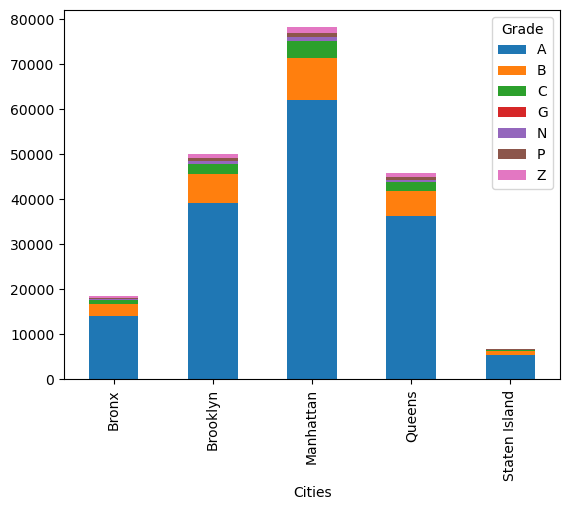

In [41]:
grade_distribution.plot(kind='bar', stacked=True)
#Plot a stacked bar chart for grade distribution.

### Score Analysis

#### Distribution of Scores:

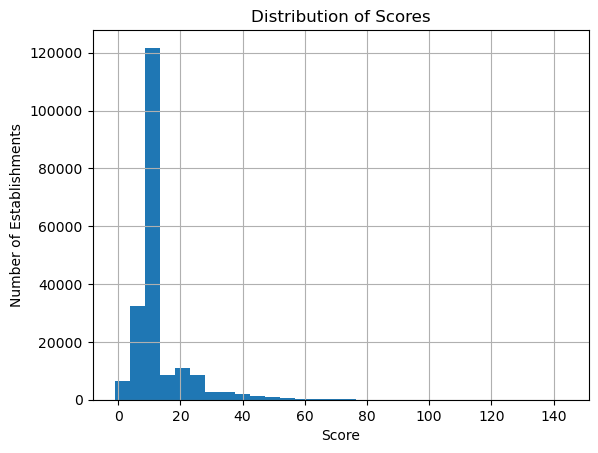

In [42]:
df['Score'].hist(bins=30)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Number of Establishments')
plt.show()
#Create a histogram of the 'Score' column with 30 bins and add title and axis labels for visualization.

#### Descriptive Statistics:

In [43]:
df['Score'].describe()
#Summarize the 'Score' column using descriptive statistics.

count    199623.000000
mean         13.228350
std           8.868005
min          -1.000000
25%           9.000000
50%          12.000000
75%          13.000000
max         144.000000
Name: Score, dtype: float64

#### Average Score by Cusine

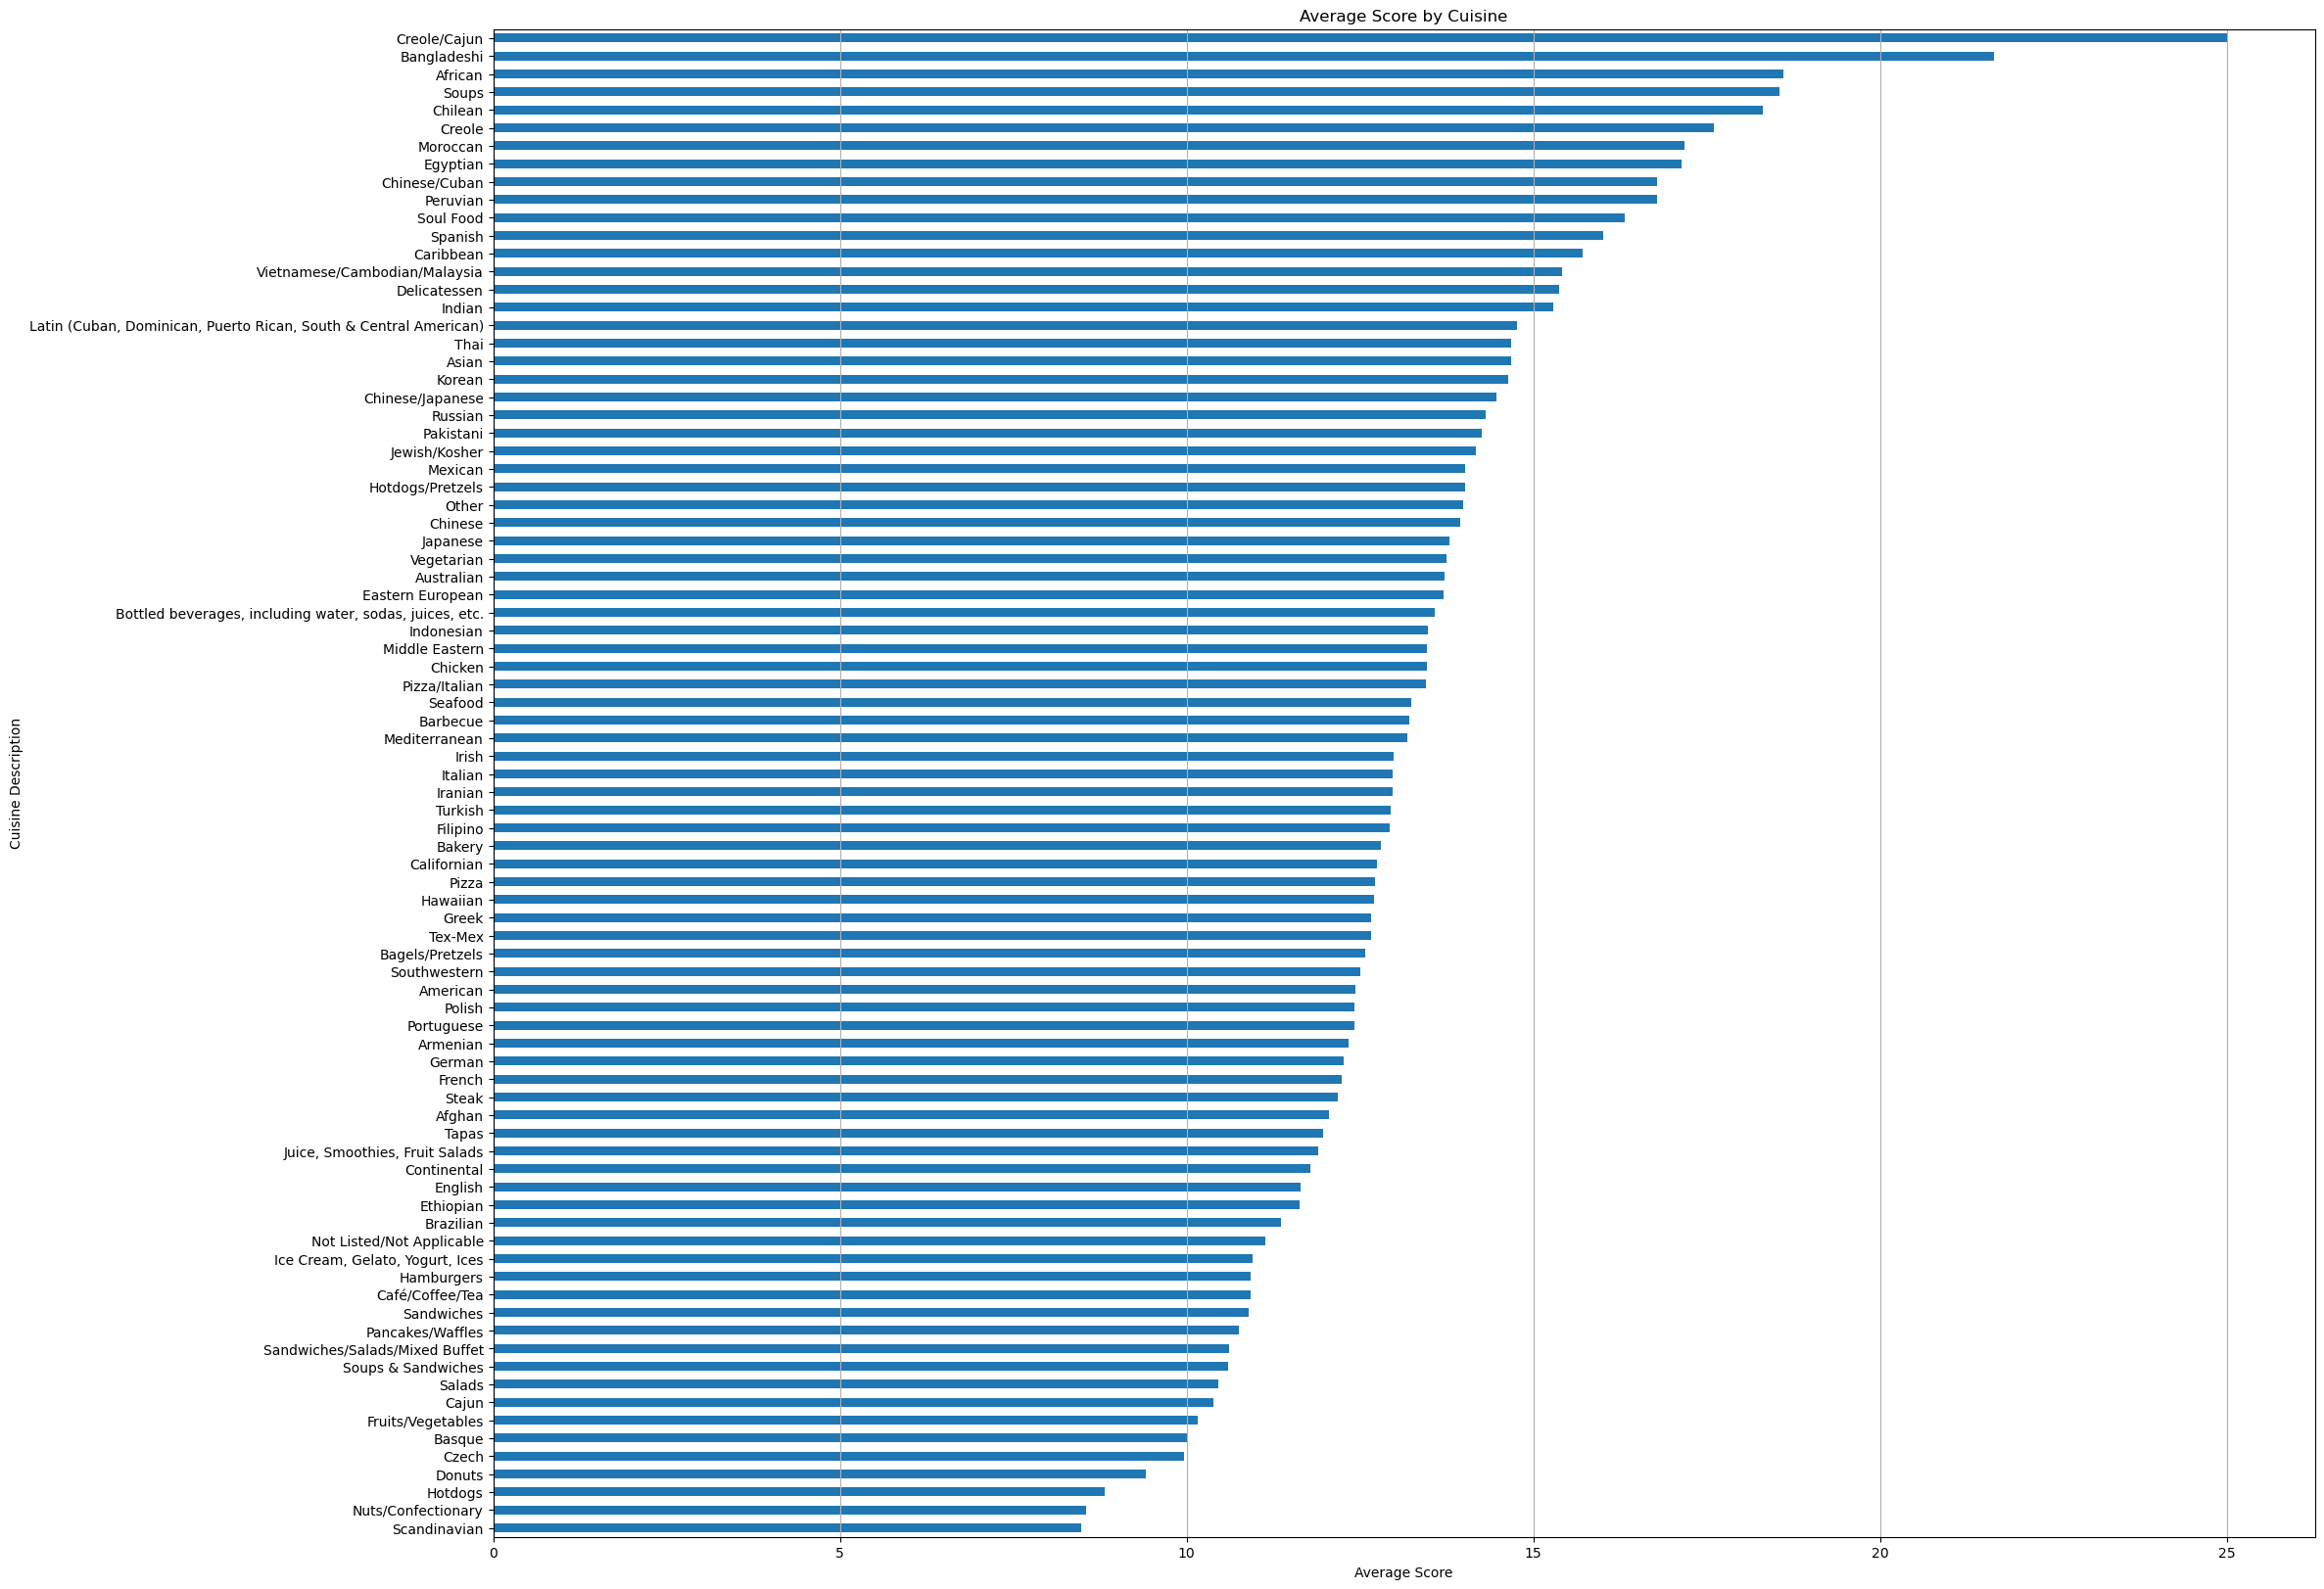

In [44]:
# Group by 'Cuisine Description' and compute the mean score for each cuisine
avg_scores_by_cuisine = df.groupby('Cuisine Description')['Score'].mean().sort_values()

# Plotting the data
plt.figure(figsize=(24, 20))
avg_scores_by_cuisine.plot(kind='barh')
plt.title('Average Score by Cuisine')
plt.xlabel('Average Score')
plt.ylabel('Cuisine Description')
plt.grid(axis='x')
plt.show()


#### Scores by Grade

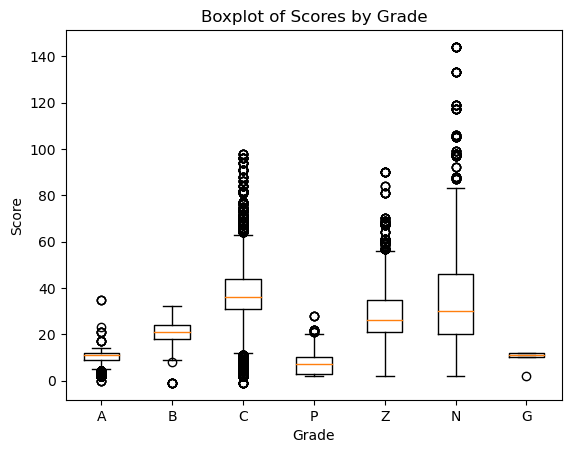

In [45]:
grades = df['Grade'].unique()
score_data = [df[df['Grade'] == grade]['Score'].values for grade in grades]
#Extract unique grades and create a list of score data for each grade.

plt.boxplot(score_data, labels=grades)
plt.title('Boxplot of Scores by Grade')
plt.xlabel('Grade')
plt.ylabel('Score')
plt.show()
#plotting a boxplot

#### Relationship between Critical Flag and Scores:

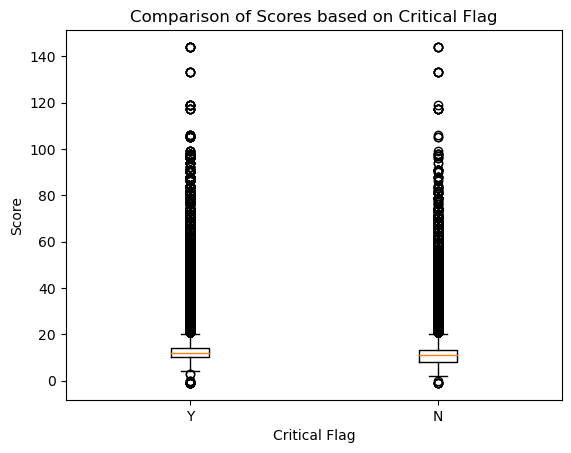

In [46]:
#Extract unique critical flags and group score data by each flag.
critical_flags = df['Critical Flag'].unique()
score_data_by_flag = [df[df['Critical Flag'] == flag]['Score'].values for flag in critical_flags]

#plotting box plot
plt.boxplot(score_data_by_flag, labels=critical_flags)
plt.title('Comparison of Scores based on Critical Flag')
plt.xlabel('Critical Flag')
plt.ylabel('Score')
plt.show()

#### Critical vs Non - Critical

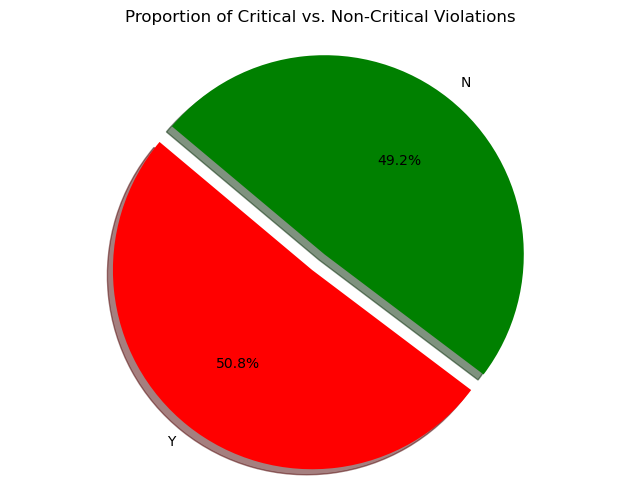

In [47]:
# Count the occurrences of critical and non-critical flags
critical_counts = df['Critical Flag'].value_counts()

# Plot the pie chart
labels = critical_counts.index
sizes = critical_counts.values
colors = ['red', 'green']  # Assuming "Yes" is for critical and comes first. Adjust as needed.
explode = (0.1, 0)  # explode 1st slice for emphasis

plt.figure(figsize=(8,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proportion of Critical vs. Non-Critical Violations")
plt.show()

### Violation Analysis

#### Most Common Violations:

In [48]:
#Count and print the top violations in the 'Violation Description' column.
print(df['Violation Description'].value_counts().head())

Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.    40862
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                 20302
Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.                                                                                                                                     15592
Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drai

#### Violations leading to Critical Flags:

In [49]:
critical_violations = df[df['Critical Flag'] == 'Y']['Violation Code'].value_counts()
print(critical_violations)
# Count and display the number of critical violations by their respective violation codes.

06D    15592
06C    13920
04L    12629
02G    10298
04N     9595
02B     9041
06E     4034
06F     3818
04H     3415
04M     3389
06A     3105
04A     2762
02H     2590
06B     1384
05D     1156
04C     1130
04K      989
04J      608
03A      289
02C      244
02I      237
04E      176
05H      144
02A      133
04O      128
05F      120
05C      110
03B       81
04D       69
02D       41
05E       36
05B       33
03C       33
06G       30
04F       19
05A       15
02F       13
03G        8
07A        8
03E        7
04B        6
04G        5
03D        4
02E        1
06H        1
06I        1
04I        1
Name: Violation Code, dtype: int64


#### Relation between Violation and Grade:

<AxesSubplot:xlabel='Violation Code'>

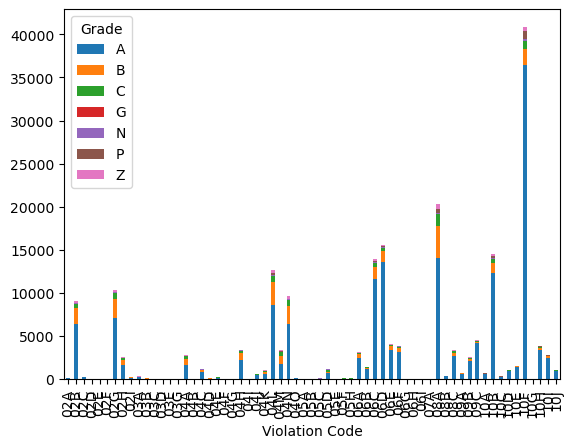

In [50]:
violation_grade = df.groupby(['Violation Code', 'Grade']).size().unstack()
violation_grade.plot(kind='bar', stacked=True)
#Visualize the distribution of violation codes by grade using a stacked bar chart.

### Grade Analysis

#### Distribution of Grades with/without Critical Flags:

<AxesSubplot:xlabel='Critical Flag'>

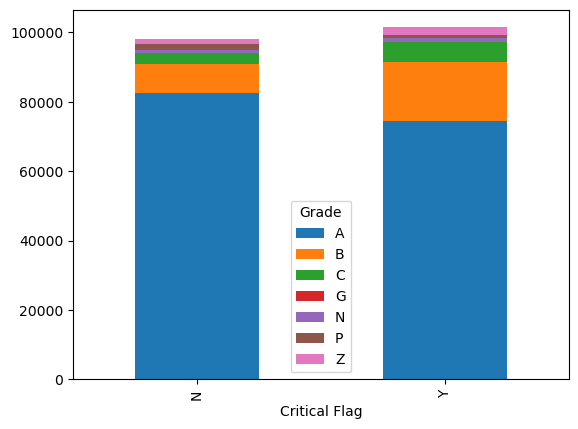

In [51]:
critical_grade_distribution = df.groupby(['Critical Flag', 'Grade']).size().unstack()
critical_grade_distribution.plot(kind='bar', stacked=True)
#Visualize the distribution of grades by critical flag using a stacked bar chart.

#### Cities with the Best/Worst Grades:

In [52]:
city_grades = df.groupby('Cities')['Grade'].apply(lambda x: x.value_counts().index[0])
city_grades
#Group by 'Cities' and find the most frequent 'Grade' for each city.

Cities
Bronx            A
Brooklyn         A
Manhattan        A
Queens           A
Staten Island    A
Name: Grade, dtype: object

### Composite Analysis:

#### City + Violation + Grade:

In [53]:
city_violation_grade = df.groupby(['Cities', 'Violation Code', 'Grade']).size().reset_index(name='Count')
city_violation_grade
# Grouping and counting violations by city, violation code, and grade.

,Cities,Violation Code,Grade,Count
0,Bronx,02A,A,3
1,Bronx,02B,A,776
2,Bronx,02B,B,216
3,Bronx,02B,C,73
4,Bronx,02B,N,5
...,...,...,...,...
1193,Staten Island,10I,B,4
1194,Staten Island,10J,A,28
1195,Staten Island,10J,B,4
1196,Staten Island,10J,C,2


### Inspection Analysis

#### Average score per month over time:

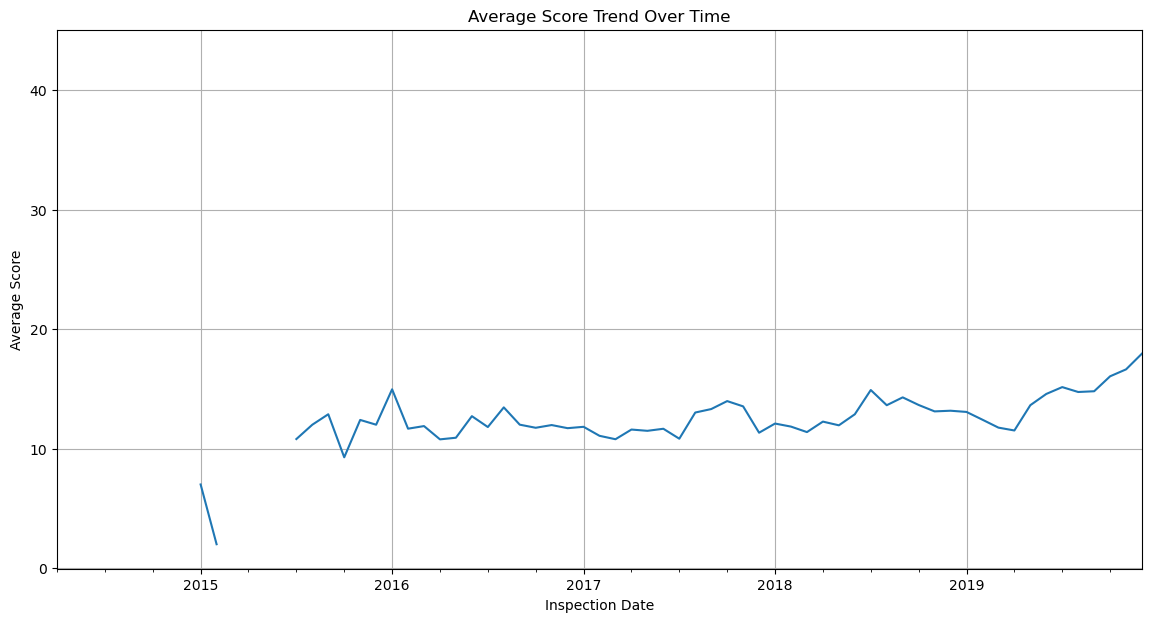

In [54]:
# First, set the 'Inspection Date' as the DataFrame's index
df.set_index('Inspection Date', inplace=True)

# Resample the data by month and take the average of the 'Score' column
monthly_avg_score = df['Score'].resample('M').mean()

# Plotting the trend
plt.figure(figsize=(14, 7))
monthly_avg_score.plot()
plt.title('Average Score Trend Over Time')
plt.ylabel('Average Score')
plt.xlabel('Inspection Date')
plt.grid(True)
plt.show()

#### Number of violations per month:

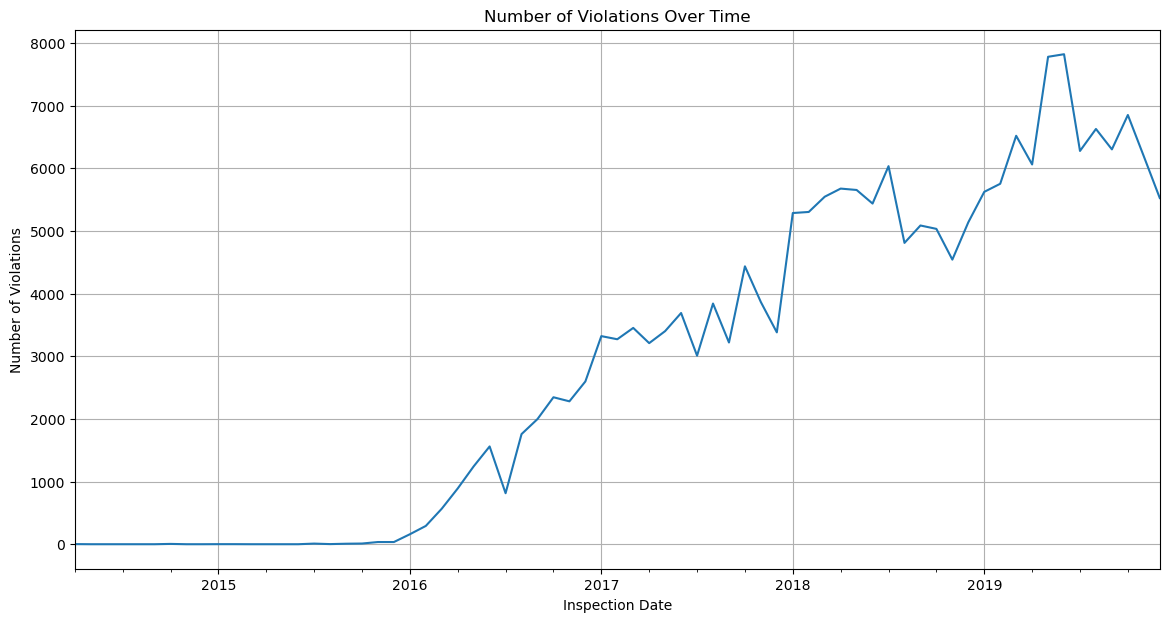

In [55]:
# Resample the data by month and count the number of violations
monthly_violations_count = df.resample('M').size()

# Plotting the trend
plt.figure(figsize=(14, 7))
monthly_violations_count.plot()
plt.title('Number of Violations Over Time')
plt.ylabel('Number of Violations')
plt.xlabel('Inspection Date')
plt.grid(True)
plt.show()

# PROJECT PHASE 2

In [56]:
df.head()

,Restaurant Name,Address,Cities,Cuisine Description,Action,Violation Code,Violation Description,Critical Flag,Score,Grade,Grade Date,Record Date,Inspection Type,Community Board,Council District,Census Tract
Inspection Date,,,,,,,,,,,,,,,,
2018-06-08,Mcdonald'S,599 - East Tremont Avenue - 10457.0,Bronx,Hamburgers,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,9.0,A,2018-06-08T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,206.0,17.0,37504.0
2017-11-09,Papa John'S Pizza,1520 - Westchester Ave - 10472.0,Bronx,Pizza,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,13.0,A,2017-11-09T00:00:00.000,2019-12-27T06:01:01.000,Pre-permit (Operational) / Initial Inspection,209.0,18.0,5002.0
2018-07-26,Fordham Restaurant,2506 - Grand Concourse - 10458.0,Bronx,American,Violations were cited in the following area(s).,02E,"Whole frozen poultry or poultry breasts, other...",Y,12.0,A,2018-07-26T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,207.0,15.0,39901.0
2019-06-05,Jes Catering,1438 - E Gun Hill Rd - 10469.0,Bronx,Caribbean,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,7.0,A,2019-06-05T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,211.0,12.0,36000.0
2017-02-23,Basics Cafeteria,1064 - Franklin Avenue - 10456.0,Bronx,American,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Y,12.0,A,2017-02-23T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,203.0,16.0,18500.0


### LINEAR REGRESSION

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [58]:
label = LabelEncoder()
df['Critical Flag'] = label.fit_transform(df['Critical Flag'])
df['Violation Code']=label.fit_transform(df['Violation Code'])
df['Cuisine Description']=label.fit_transform(df['Cuisine Description'])

In [59]:
df.head()

,Restaurant Name,Address,Cities,Cuisine Description,Action,Violation Code,Violation Description,Critical Flag,Score,Grade,Grade Date,Record Date,Inspection Type,Community Board,Council District,Census Tract
Inspection Date,,,,,,,,,,,,,,,,
2018-06-08,Mcdonald'S,599 - East Tremont Avenue - 10457.0,Bronx,37,Violations were cited in the following area(s).,40,"Food contact surface not properly washed, rins...",1,9.0,A,2018-06-08T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,206.0,17.0,37504.0
2017-11-09,Papa John'S Pizza,1520 - Westchester Ave - 10472.0,Bronx,62,Violations were cited in the following area(s).,26,Evidence of mice or live mice present in facil...,1,13.0,A,2017-11-09T00:00:00.000,2019-12-27T06:01:01.000,Pre-permit (Operational) / Initial Inspection,209.0,18.0,5002.0
2018-07-26,Fordham Restaurant,2506 - Grand Concourse - 10458.0,Bronx,2,Violations were cited in the following area(s).,4,"Whole frozen poultry or poultry breasts, other...",1,12.0,A,2018-07-26T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,207.0,15.0,39901.0
2019-06-05,Jes Catering,1438 - E Gun Hill Rd - 10469.0,Bronx,16,Violations were cited in the following area(s).,58,Non-food contact surface improperly constructe...,0,7.0,A,2019-06-05T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,211.0,12.0,36000.0
2017-02-23,Basics Cafeteria,1064 - Franklin Avenue - 10456.0,Bronx,2,Violations were cited in the following area(s).,42,Wiping cloths soiled or not stored in sanitizi...,1,12.0,A,2017-02-23T00:00:00.000,2019-12-27T06:01:01.000,Cycle Inspection / Initial Inspection,203.0,16.0,18500.0


In [60]:
X = df[['Critical Flag']]  # Features - placeholder for actual feature selection
y = df['Score']  

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
model = LinearRegression()

In [63]:
model.fit(X_train, y_train)

LinearRegression()

In [78]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [64]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [65]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Squared Error: 80.46
R2 Score: 0.03


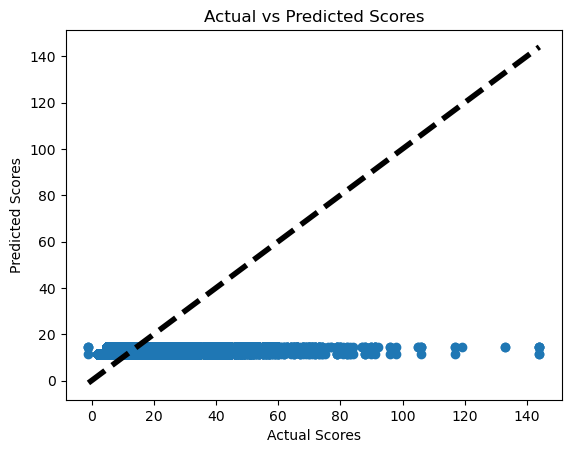

In [66]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

### LOGISTIC REGRESSION

In [67]:
X2 = df[['Violation Code', 'Cuisine Description']]
y2 = df['Grade']

In [68]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [69]:
logistic_model = LogisticRegression()

In [70]:
logistic_model.fit(X2_train, y2_train)

/Users/yuktikholiwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
import pickle

In [72]:
# Save the model to a pickle file
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(logistic_model, file)

In [73]:
y2_pred = logistic_model.predict(X2_test)

In [74]:
# Calculating accuracy
accuracy = accuracy_score(y2_test, y2_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


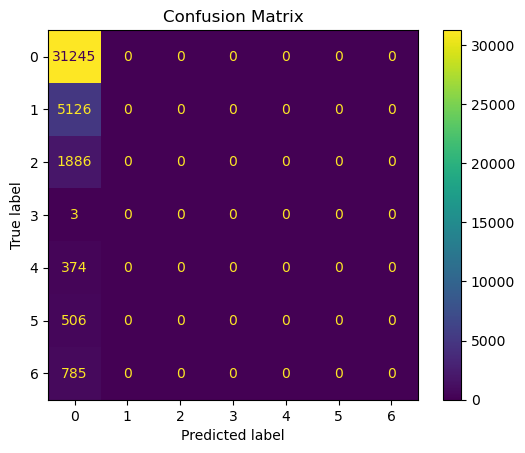

In [77]:
# Assuming 'logistic_model' is your trained Logistic Regression model
# and 'X2_test' has been transformed appropriately

# Predict probabilities for the positive outcome only
y2_pred_prob = logistic_model.predict_proba(X2_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y2_test, y2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

### k-Means Clustering

In [79]:
features_for_clustering = ['Score', 'Critical Flag']
X = df[features_for_clustering]

In [80]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [81]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/Users/akarshijain/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/akarshijain/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/akarshijain/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/akarshijain/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

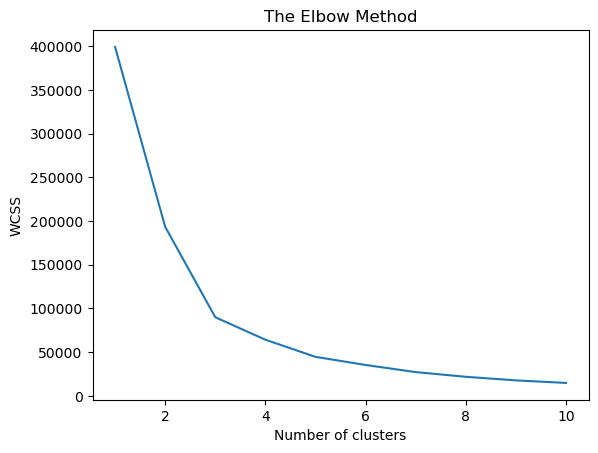

In [82]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [83]:
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

/Users/akarshijain/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [84]:
df['Cluster'] = y_kmeans

In [85]:
print(df.groupby('Cluster').mean())

         Cuisine Description  Violation Code  Critical Flag      Score  \
Cluster                                                                  
0                  30.802949       27.318470       1.000000  10.941493   
1                  30.398222       54.733409       0.000000   9.611557   
2                  33.383518       22.702882       1.000000  25.452779   
3                  33.670506       31.943491       0.730493  52.244295   
4                  33.612683       51.765906       0.000000  25.192975   

         Community Board  Council District  Census Tract  
Cluster                                                   
0             249.225863         19.979367  29029.274124  
1             248.742326         20.003198  28901.372936  
2             248.589030         19.962996  29542.854423  
3             245.911842         19.694956  28041.380044  
4             251.093753         20.468447  29851.714590  


/var/folders/ry/bnwtqggj17j1gpnywqrppwx00000gn/T/ipykernel_7331/2056616278.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Cluster').mean())


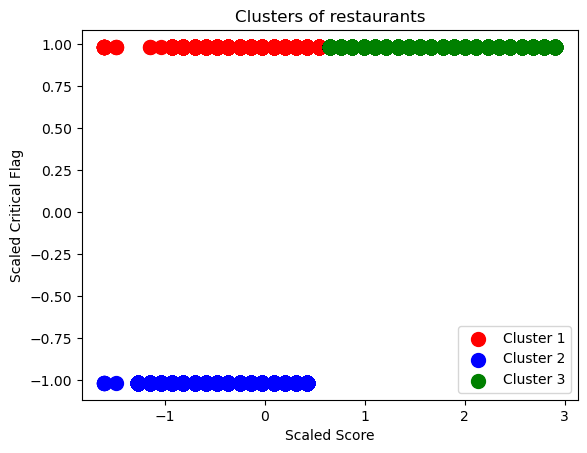

In [86]:
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of restaurants')
plt.xlabel('Scaled Score')
plt.ylabel('Scaled Critical Flag')
plt.legend()
plt.show()

### k-Nearest Neighbors

In [75]:
# k-Nearest Neighbors
X3 = df[['Cuisine Description', 'Violation Code', 'Critical Flag']]
y3 = df['Grade']

In [76]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [77]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [78]:
knn_model.fit(X3_train, y3_train)

KNeighborsClassifier()

In [79]:
y3_pred = knn_model.predict(X3_test)

In [80]:
# Calculating accuracy
accuracy = accuracy_score(y3_test, y3_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


In [81]:
knn_matrix = confusion_matrix(y3_test, y3_pred)

In [82]:
print(knn_matrix)

[[30299   897    43     0     6     0     0]
 [ 4777   321    23     0     5     0     0]
 [ 1697   163    17     0     8     0     1]
 [    3     0     0     0     0     0     0]
 [  336    19     6     0    13     0     0]
 [  485    20     1     0     0     0     0]
 [  725    54     6     0     0     0     0]]


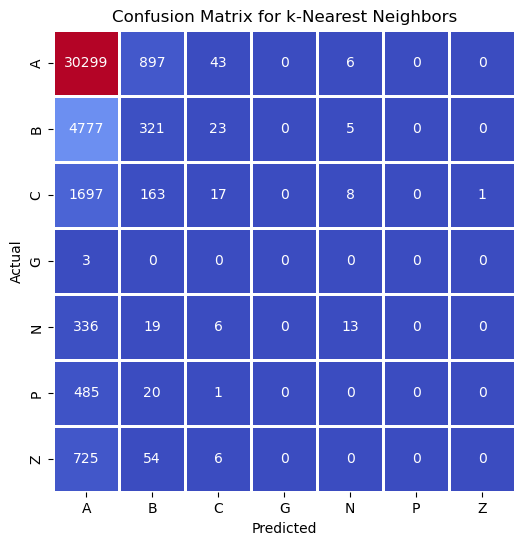

In [83]:
plt.figure(figsize=(8, 6))
sns.heatmap(knn_matrix, annot=True, fmt='d', cmap='coolwarm',linewidths=1, square=True, cbar=False, xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for k-Nearest Neighbors')
plt.show()

### NAIVE BAYES

In [84]:
X4 = df['Violation Description']
y4 = df['Critical Flag']

In [85]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X4)

In [86]:
# Splitting the data into training and testing sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X_tfidf, y4, test_size=0.2, random_state=42)

In [87]:
# Creating and training Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X4_train, y4_train)


MultinomialNB()

In [88]:
y4_pred = nb_model.predict(X4_test)

In [89]:
report = classification_report(y4_test, y4_pred)

In [90]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19498
           1       1.00      1.00      1.00     20427

    accuracy                           1.00     39925
   macro avg       1.00      1.00      1.00     39925
weighted avg       1.00      1.00      1.00     39925



In [91]:
# Computing the confusion matrix
nb_matrix = confusion_matrix(y4_test, y4_pred)

In [92]:
# Calculating accuracy
accuracy = accuracy_score(y4_test, y4_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


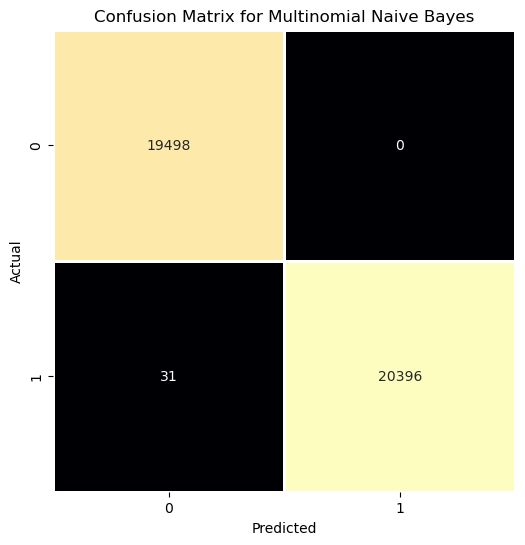

In [93]:
# Visualizing the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(nb_matrix, annot=True, fmt='d', cmap='magma',linewidths=1, square=True, cbar=False, xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.show()

### RANDOM FOREST

In [94]:
# Random Forest
X5 = df[['Score', 'Violation Code', 'Cuisine Description']]
y5 = df['Grade']

In [95]:
# Split the data into training and testing sets
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

In [96]:
# Create and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)  # You can adjust the number of estimators
rf_model.fit(X5_train, y5_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [97]:
# Visualize feature importances
features = rf_model.feature_importances_
feature_names = X5.columns

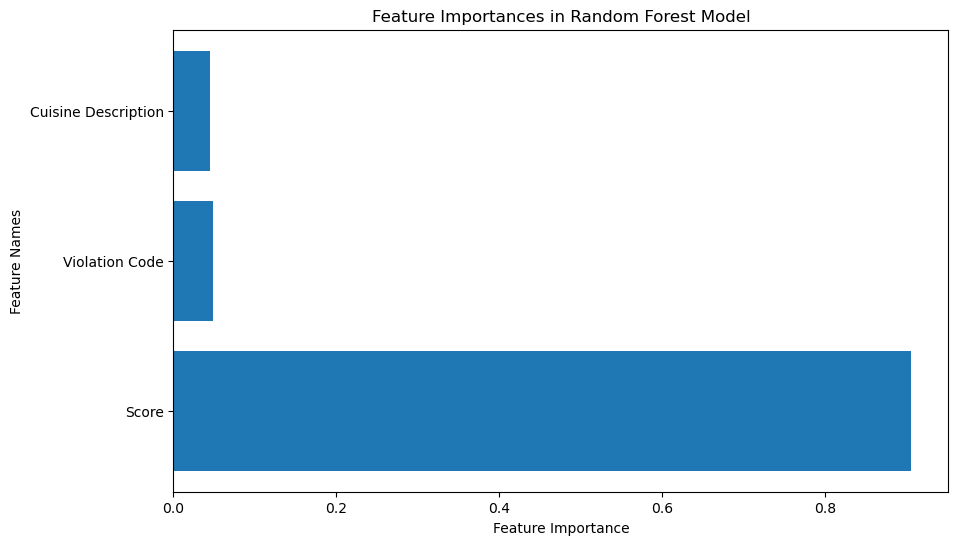

In [98]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importances in Random Forest Model')
plt.show()

### SVM CLASSIFIER

In [149]:
X6 = df[['Violation Code', 'Critical Flag']]
y6 = df['Inspection Type']

In [151]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42)

In [153]:
# Creating and training the SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X6_train, y6_train)

SVC(kernel='linear', random_state=42)

In [154]:
# Making predictions
y6_pred = svm_model.predict(X6_test)

In [157]:
# Calculating accuracy
accuracy = accuracy_score(y6_test, y6_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.48


In [158]:
# Creating a confusion matrix
svm_matrix = confusion_matrix(y6_test, y6_pred)

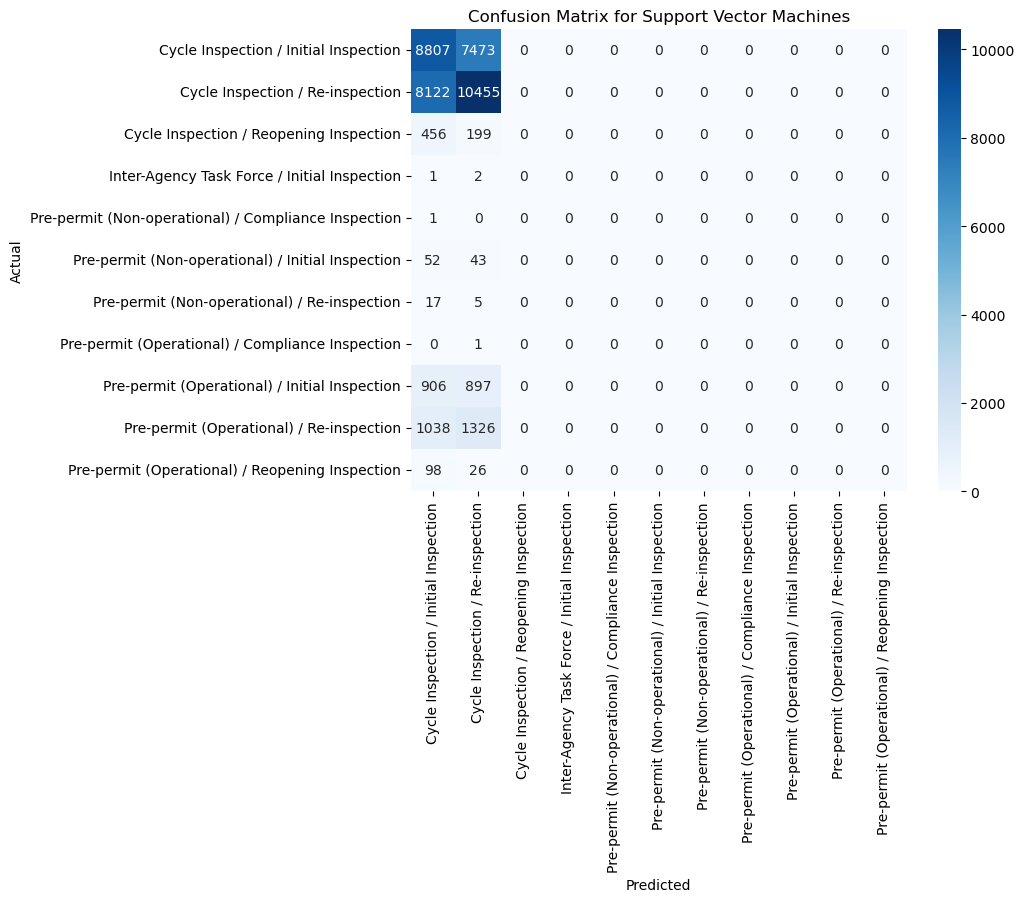

In [159]:
# Visualizing the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(svm_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Support Vector Machines')
plt.show()